## Introduction
### The purpose of this tutorial is to give a demonstration of the 10 step method we can use in scikit learn to do any machine learnig task. In particular we are tackling the classification problem where we are predicting a categorical outcome variable.**
### The dataset
**We use the famous iris dataset to demonstrate the code for predicting the outcome which is the species of the flower. This dataset in available in the datasets library of scikit learn**


### Attribute Information
**Attribute Information (in order)**:
   - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
### Description of the task
The task is to produce a machine learning model to predict the median price of a house ( in 1000's of USD) called 'MEDV' given the rest of the features 


### The steps of Machine Learning Prediction Task
1. Import the required libraries
2. Load the dataset and view it
3. Do a sanity check on the data 
4. Do the exploratory data analysis(EDA)
5. Preprocess the data and do the feature engineering
6. Fit the scikit learn machine learning models on the training data 
7. Evaluate the model performance of the models on the test data 
8. Optimize/Regularize the Model using RidgeCV, LassoCV, GridSearchCV
9. Interpretation of the Model
10. Deploy the experimental model using pycaret and streamlit

### Step1: Load the Libraries 
- In this step we load all the essential libtraries to do our analysis of the datset and fit the linear models


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
print(" All the libraries are imported")

 All the libraries are imported


### Step2: Load the dataset and view it
- If it is a .csv or .xlsx file we just use pandas.read_csv or pandas.read_excel

In [42]:
# from sklearn.datasets import fetch_openml
# housing=fetch_openml(name='house_prices', as_frame=True)
from sklearn.datasets import load_iris
iris=load_iris()

In [43]:
type(iris)

sklearn.utils.Bunch

The Boston housing datset is in the form of a data type called Bunch which is like a Dictionary

In [44]:
# Lets get the keys of the bunch
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [45]:
# Lets access the values of the dDescription key DESCR
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
# get the features and target arrays
X=iris.data
y=iris.target

In [47]:
# convert the Boston bunch data into pandas dataframe
df=pd.DataFrame(X, columns=iris.feature_names)
df['class']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
# Lets encode the outcome variable to identofy the classes
d={0:'setosa', 1:'versicolor', 2:'virginica'}
df['class']=df['class'].map(d)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step3: Do a sanity check on data
This includes looking at the:
- shape of the dataset
- datatypes of variables-- to look for any consistencies regarding datatypes
- descriptives of numerical variables
         - to identify any data engineering error, eg where missing values in numerical variables are replaced by 0
- To look for any non interpreatble symbols like $ sign in front of prices 
- Do a value counts for all categorical variables
- To Look for inconsistencies among classes of categorical variables ( example if type of is wriiten as 'county' vs.   type 'COUNTY' vs 'County'

In [49]:
# get the shape of the dataset
print(df.shape)
print('')
print("The number of rows is ", df.shape[0])
print('')
print("The number of columns is ", df.shape[1])

(150, 5)

The number of rows is  150

The number of columns is  5


In [50]:
# get the data types of the data  
df.dtypes

# we call also use df.info()

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                 object
dtype: object

We see that all variables are numerical having correct datatypes which looks good for this dataset

In [51]:
# Identify the columns having null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

There are no null values in this datsset

In [52]:
# get the numerical descriptives 
# .T gives the transpose to mmake the descriptives more readable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Except class variable none of the columns have minimum value 0 , which also looks good 

### Step4: Do an EDA of the data
- This is a very extensive process and will differ from datset to datset
- We normally do the EDA in the following manner: Univariates Analysis, Bivariate Analysis, Multivariate Analysis, Outlier Analysis, Missing Value Treatment
- In univariate analysis we look at the shape and spread of the distrbutions of numerical datas and the class imbalances of categorical data
- In bivariate analysis we look at scatter plots, bivaraite boxplots, clustered bar charts and bivariate tables to look for relationships
- The aim of EDA is to get patterns and trends from the datset

**Univariate ANalysis**

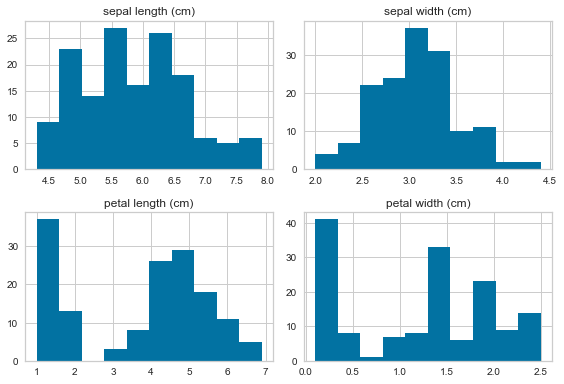

In [53]:
# lets get the univariate graphs of numerical variables
df.hist()
plt.tight_layout()

Sepal Width has approximately normal distribution whereas other variables need some transformation, but we are going to ignore that in this demo

sepal length (cm)


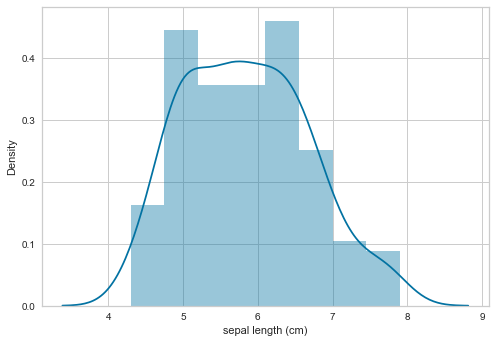

****************************************************
sepal width (cm)


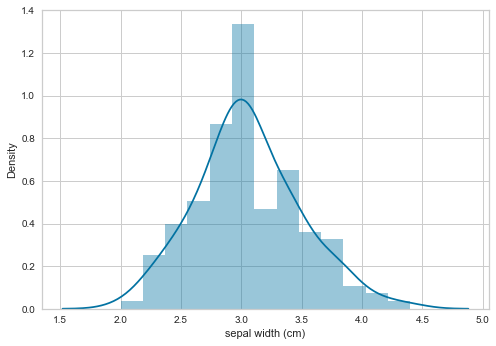

****************************************************
petal length (cm)


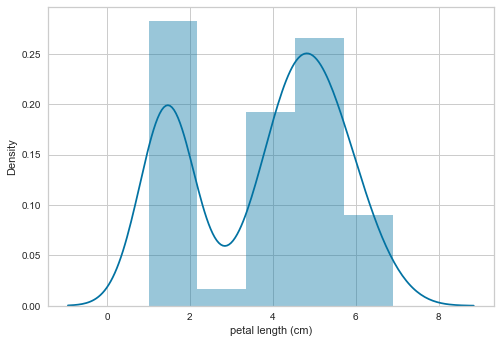

****************************************************
petal width (cm)


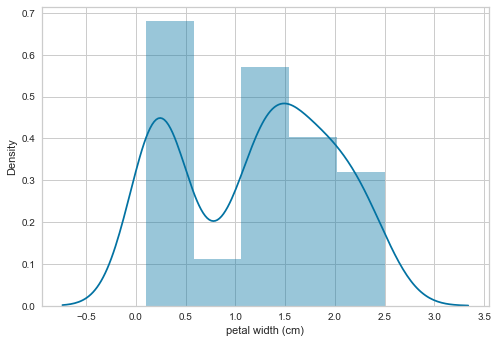

****************************************************


In [54]:
# look at the individual distribution plots
for col in df.select_dtypes(exclude='O').columns:
    print(col)
    sns.distplot(df[col], kde=True)
    plt.show()
    print("****************************************************")

The outcome variable MEDV is approximately normally distributed 

<AxesSubplot:>

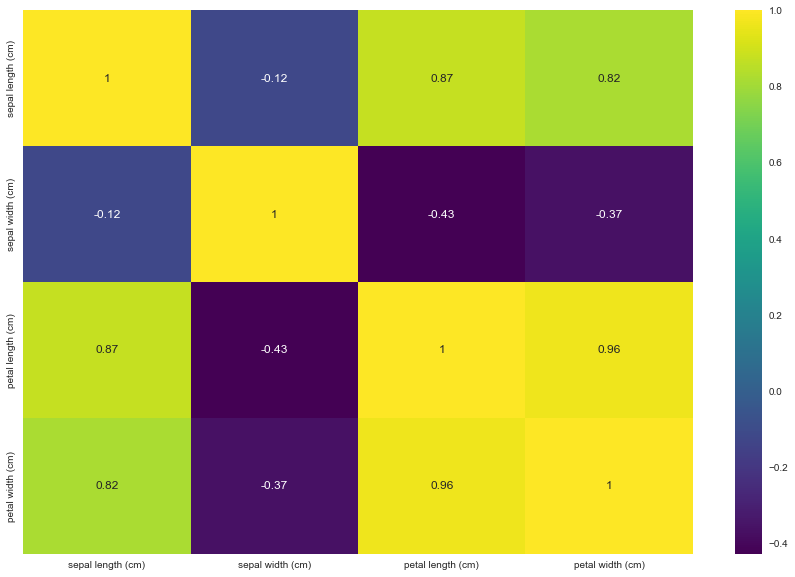

In [55]:
#Create a correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

- We notice a lot of multicollinearity between variables but in this demo we are going to ignore that

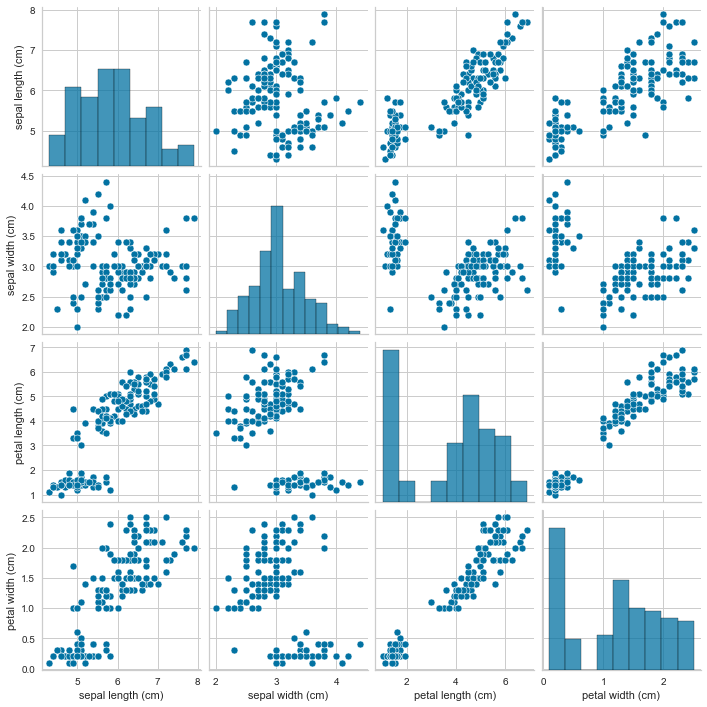

In [56]:
# we make a pairplot to get the bivariate relationships
sns.pairplot(df)

- We notice almost perfect clustering into 3 seperate classes with respect to Petal Length and Petal Width but we will stick to classification for thos demo

### Step5: Do the feature pre-processing for Classification
- This step inlcudes things like:
1. Sepearate the features and label
2. Impute the missing values
3. Do the label encoding/one-hot encoding for categorical features
4. Do the train test split
5. Do the feature scaling

In [57]:
# Seperate the features and the target
# Here we are using all features and MEDV as target
X=df.drop('class', axis=1)
y=df['class']

Since there are no missing values or categorical variable we got tjhe next step whcih is train-test-split

In [58]:
# Do the train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3 ,random_state=401)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(105, 4) (105,) (45, 4) (45,)


In [59]:
# Feature scaling is additional for regression since scikit learn performs feature scaling under the hood, you can test this 
#by seeing that scaling has no imporvement in the overall performance of regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Step6: Fit the classification models on training set
- Scikit learn performs classification using many algorithms like decision trees, random forest , KNN, Naive Bayes etc but  needs the data to be as a numpy array or a pandas dataframe
- We can optimize the algorithm chosen using GridSearchCV 

**Classification model**

In [60]:
# instantiate the scikit learn model
model_cls=LogisticRegression()

# fit the model to the training set 
model_cls.fit(x_train, y_train)

# making prediction on the testing set
y_pred=model_cls.predict(x_test)

### Step7: Evaluate the model performance on the Test set 

In [61]:
# let us create a function for evaluation
def evaluate(y_test, y_pred, model_name):
    print("The model metrics below are for the model "+model_name)
    print('')
    print("The accuracy score is ", accuracy_score(y_test, y_pred))
    print("")
    print("The recall score is ", recall_score(y_test, y_pred, average="weighted"))
    print("")
    print("The precision score is ", precision_score(y_test, y_pred, average="weighted"))
    print("")

In [62]:
# Evaluate the metrics for the OLS model
evaluate(y_test, y_pred, "Random Forest Classifier")

The model metrics below are for the model Random Forest Classifier

The accuracy score is  0.9777777777777777

The recall score is  0.9777777777777777

The precision score is  0.9792592592592592



The current Random Forest model performs at a precision score of 97.9 % and recall of 97.7% which is excellent

**Trying other Classification Models**

In [63]:
# We first use Decision Tree  which is an entropy based model
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred=model_dt.predict(x_test)
evaluate(y_test, y_pred, 'Decision Tree Classifier')


The model metrics below are for the model Decision Tree Classifier

The accuracy score is  0.9777777777777777

The recall score is  0.9777777777777777

The precision score is  0.9792592592592592



In [64]:
# next we make a Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred=model_rf.predict(x_test)
evaluate(y_test, y_pred, 'Random Forest Classifier')

The model metrics below are for the model Random Forest Classifier

The accuracy score is  0.9777777777777777

The recall score is  0.9777777777777777

The precision score is  0.9792592592592592



In [65]:
from sklearn.svm import SVC
model_svr=SVC()
model_svr.fit(x_train, y_train)
y_pred=model_svr.predict(x_test)
evaluate(y_test, y_pred, 'Support Vector Classifier')

The model metrics below are for the model Support Vector Classifier

The accuracy score is  0.9777777777777777

The recall score is  0.9777777777777777

The precision score is  0.9792592592592592



In [66]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_pred=model_knn.predict(x_test)
evaluate(y_test, y_pred, 'K Nearest Neighbors')

The model metrics below are for the model K Nearest Neighbors

The accuracy score is  0.9777777777777777

The recall score is  0.9777777777777777

The precision score is  0.9792592592592592



**We see that all model performs excellently oin this dateset with recall score of 0.978 and precision score of o.979. Let us optimize the Random Forest Model using  GridSearchCV before deployment**

### Step8: Optimization
- Optimization is the process of applying GridSearchCv to find optimum hyperparameters for a chosel model so as to enhance the prerformance ( increasing precision/recall) and in reducing overfitting

**Grid Search CV**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# set the parameter grid
n_folds=10
param_grid={'n_estimators':[100, 200, 300, 400, 500], 'criterion' : ['entropy','gini'], 'max_depth':[1,10], 
            'min_samples_leaf':[1,5], 'min_samples_split':[3,9], 'max_features':['sqrt', 'log2'] }

grid=GridSearchCV(estimator=model_rf, param_grid=param_grid,n_jobs=-1, cv=n_folds,verbose=3,  return_train_score=False )

grid.fit(x_train, y_train)

print("Best params are :", grid.best_estimator_)
print("")
print("Best score is :", grid.best_score_)


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  4.6min finished


Best params are : RandomForestClassifier(max_depth=1, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=3, n_estimators=200)

Best score is : 0.9627272727272727


In [27]:
tuned_model_rf=RandomForestClassifier(max_depth=1, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=3, n_estimators=200)
tuned_model_rf.fit(x_train, y_train)
y_pred=tuned_model_rf.predict(x_test)
evaluate(y_test, y_pred, 'Tuned Random Forest')

The model metrics below are for the model Tuned Random Forest

The accuracy score is  0.9777777777777777

The recall score is  0.9777777777777777

The precision score is  0.9792592592592592



We see the tuned model performing better on the test data than the untuned model

### Step9: Interpretation of the model

In [28]:
!pip install shap

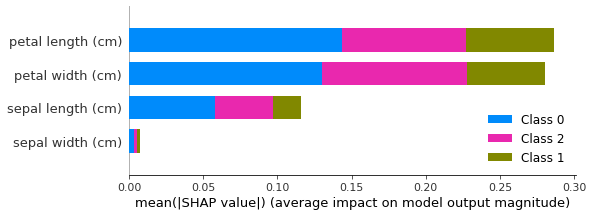

In [29]:
# use shap to interpret the model
import shap
names=X.columns
value=shap.TreeExplainer(tuned_model_rf).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=names)

We see that the most important features for predicting the flower species are petal length and petal width

### Step10: Deploy the Regression Model using Pycaret and Streamlit

Check out these links for more informaytion on pycaret and streamlit
- https://pycaret.org/regression1/
- https://streamlit.io/

In [30]:
!pip install pycaret
!pip install streamlit

In [67]:
import pycaret
#import classification module
from pycaret.classification import *
#intialize the setup
exp_cls = setup(df, target = 'class')

,Description,Value
0,session_id,4398
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"setosa: 0, versicolor: 1, virginica: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [68]:
# compare different regression models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9800,0.9971,0.9806,0.9850,0.9797,0.9699,0.9725,0.4440
gbc,Gradient Boosting Classifier,0.9800,0.9907,0.9778,0.9800,0.9800,0.9697,0.9697,0.1230
qda,Quadratic Discriminant Analysis,0.9709,1.0000,0.9667,0.9777,0.9699,0.9558,0.9595,0.0070
ada,Ada Boost Classifier,0.9709,0.9986,0.9694,0.9777,0.9702,0.9559,0.9597,0.0690
lda,Linear Discriminant Analysis,0.9709,0.9971,0.9667,0.9777,0.9699,0.9558,0.9595,0.0080
dt,Decision Tree Classifier,0.9700,0.9786,0.9667,0.9725,0.9697,0.9545,0.9559,0.0230
knn,K Neighbors Classifier,0.9609,0.9829,0.9583,0.9702,0.9599,0.9408,0.9459,0.0090
rf,Random Forest Classifier,0.9509,0.9971,0.9500,0.9577,0.9505,0.9259,0.9296,0.0690
et,Extra Trees Classifier,0.9509,0.9957,0.9472,0.9577,0.9502,0.9257,0.9294,0.1290
nb,Naive Bayes,0.9318,0.9917,0.9306,0.9368,0.9307,0.8970,0.9004,0.0060


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4398, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# create a 10 fold cross validation for Gradient Boosting Classifier
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.9071,0.7778,0.8000,0.8000,0.6970,0.6970
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [70]:
# tune the model
tuned_gbc=tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9167,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9714,0.8889,0.9250,0.8971,0.8485,0.8616
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616


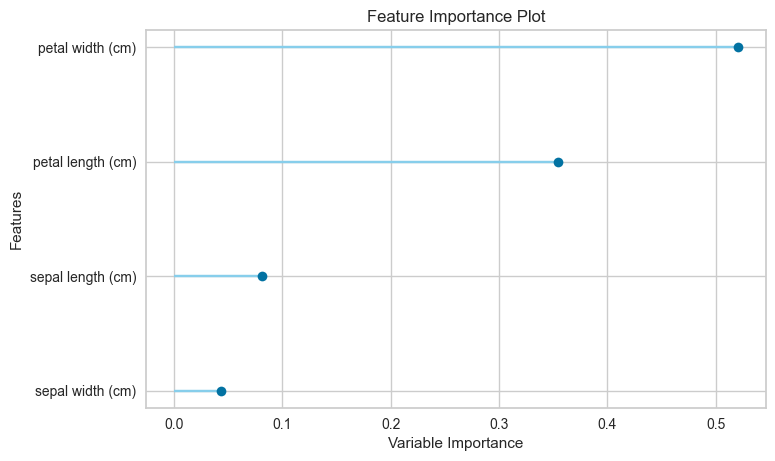

In [71]:
# interpret the model
plot_model(tuned_gbc, plot='feature')

In [73]:
# save the model
save_model(tuned_gbc, 'Final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                             learning_rate=0.05, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             mi

# Deployment in Streamlit

**Note**: 
1. When you run the code below this will create a **app.py** file in your working directory
2. Use **python --version** command in anaconda command prompt to check the version of the python insatlled 
3. Make sure it is **Python 3.8 or Python 3.7**
4. If is different create a new virual environment in anaconda using **Python 3.8**
5. From the anaconda command prompt of this new virtual environment cd to the working directory and run the command **streamlit run app.py**

In [74]:
%%writefile app.py
import pandas as pd
import streamlit as st
from pycaret.classification import load_model, predict_model

#STEP1 : IMPORT THE TRAINED MODEL PIPELINE
# import the trained model
model=load_model('Final_model')


# STEP2: GET NEW DATA FOR PREDICTION FROM THE FRONT END
st.title("App to predict the flower species")
sepal_length=st.slider('sepal length (cm)', 2.00, 8.00)
sepal_width=st.slider('sepal width (cm)',2.00, 4.50)
petal_length=st.slider('petal length (cm)', 1.00, 7.00)
petal_width=st.slider('petal width (cm)',0.00, 2.50)

data={
    'sepal length (cm)': sepal_length,
    'sepal width (cm)': sepal_width,
    'petal length (cm)': petal_length,
    'petal width (cm)':petal_width
}

input_data=pd.DataFrame([data])
#input_data=str(input_data)

# STEP3 : GET THE PREDICTION AND DISPLAY IT
if st.button("Predict"):
    prediction=predict_model(model, input_data)
    st.success("The predicted species of the flower is as below")
    prediction['Label'][0]

Overwriting app.py


# END